In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) # Importo las librerias que necesito para mi análisis

In [2]:
yf.pdr_override()
SP500 = pdr.get_data_yahoo("^GSPC", start="2000-01-01", end="2023-02-23")

[*********************100%***********************]  1 of 1 completed


In [3]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [4]:
SP500.shape   # Tengo la informacion del precio del SP500 por dia desde el 1 de Enero del 2000, lo que nos da muchos datos y dataset grande

(5822, 6)

In [5]:
yf.pdr_override()
SP500M = pdr.get_data_yahoo("^GSPC", start="2000-01-01", end="2023-02-23", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [6]:
SP500M.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,1469.250000,1478.000000,1350.140015,1394.459961,1394.459961,21494400000
2000-02-01,1394.459961,1444.550049,1325.069946,1366.420044,1366.420044,20912000000
2000-03-01,1366.420044,1552.869995,1346.619995,1498.579956,1498.579956,26156200000
2000-04-01,1498.579956,1527.189941,1339.400024,1452.430054,1452.430054,20106460000
2000-05-01,1452.430054,1481.510010,1361.089966,1420.599976,1420.599976,19898300000


In [7]:
SP500M.shape # Aqui prefiero tener la info en intervalos de un mes, para que el Dataset sea mas corto y mas facil de interpretar

(278, 6)

In [8]:
SP500M.info() # Toda las variables son numericas asi que no tenemos que hacerle cambios al Dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2000-01-01 to 2023-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       278 non-null    float64
 1   High       278 non-null    float64
 2   Low        278 non-null    float64
 3   Close      278 non-null    float64
 4   Adj Close  278 non-null    float64
 5   Volume     278 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.2 KB


In [9]:
SP500M.isnull().sum() # No tenemos valores nulos en nuestros datos

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
SP500M.describe() # Analisis descriptivo del Dataset

,Open,High,Low,Close,Adj Close,Volume
count,278.000000,278.000000,278.000000,278.000000,278.000000,2.780000e+02
mean,1883.284885,1946.715110,1813.605000,1890.767409,1890.767409,6.920742e+10
std,975.413722,1011.996264,938.030975,980.512173,980.512173,2.967973e+10
min,729.570007,832.979980,666.789978,735.090027,735.090027,1.908910e+10
25%,1185.932465,1221.417542,1132.940002,1181.767517,1181.767517,4.333739e+10
50%,1430.114990,1476.255005,1387.675049,1430.114990,1430.114990,7.315890e+10
75%,2386.407471,2414.277466,2327.274963,2404.900024,2404.900024,8.608670e+10
max,4778.140137,4818.620117,4560.000000,4766.180176,4766.180176,1.621854e+11


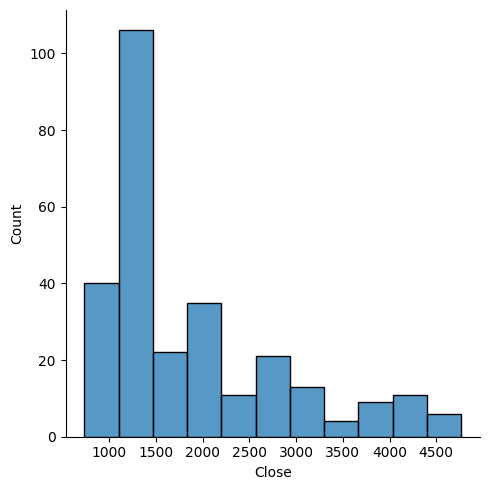

In [11]:
sns.displot(SP500M['Close'])  # Con este grafico podemos ver como estan distribuidos los precios del Indice, donde la mayoria del tiempo desde el año 2000
                              # el precio ha rondado los 1000-1500, actualmente esta alrededor de los 4000 asi que esto nos da una idea de que la 
                              # economica norteamericana ha crecido mucho en los ultimos años

<Axes: xlabel='Date'>

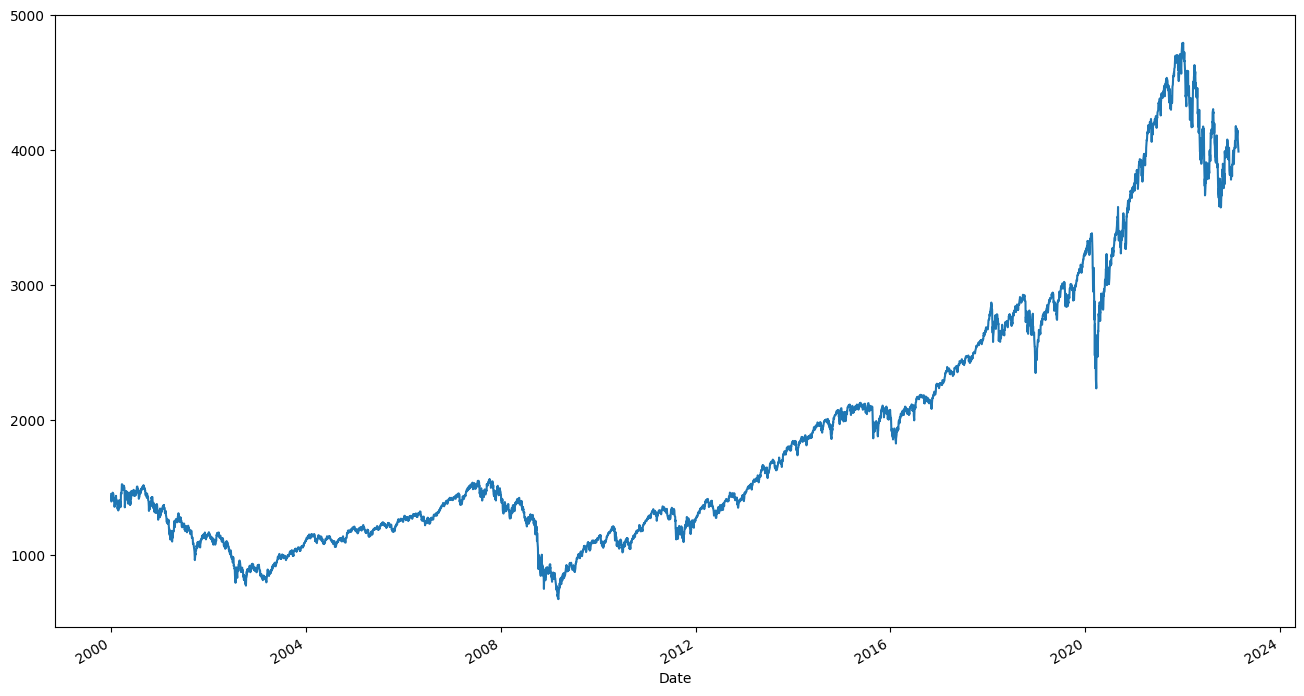

In [12]:
SP500.Close.plot(figsize=(16,9)) # Aqui podemos ver con mayor claridad y de una forma mas visual como ha fluctuado el precio 
                                 # Vemos caidas importantes en el indice a lo largo del tiempo, lo que se traduce a muy buenas oportunidades de inversion !

<Axes: xlabel='Date'>

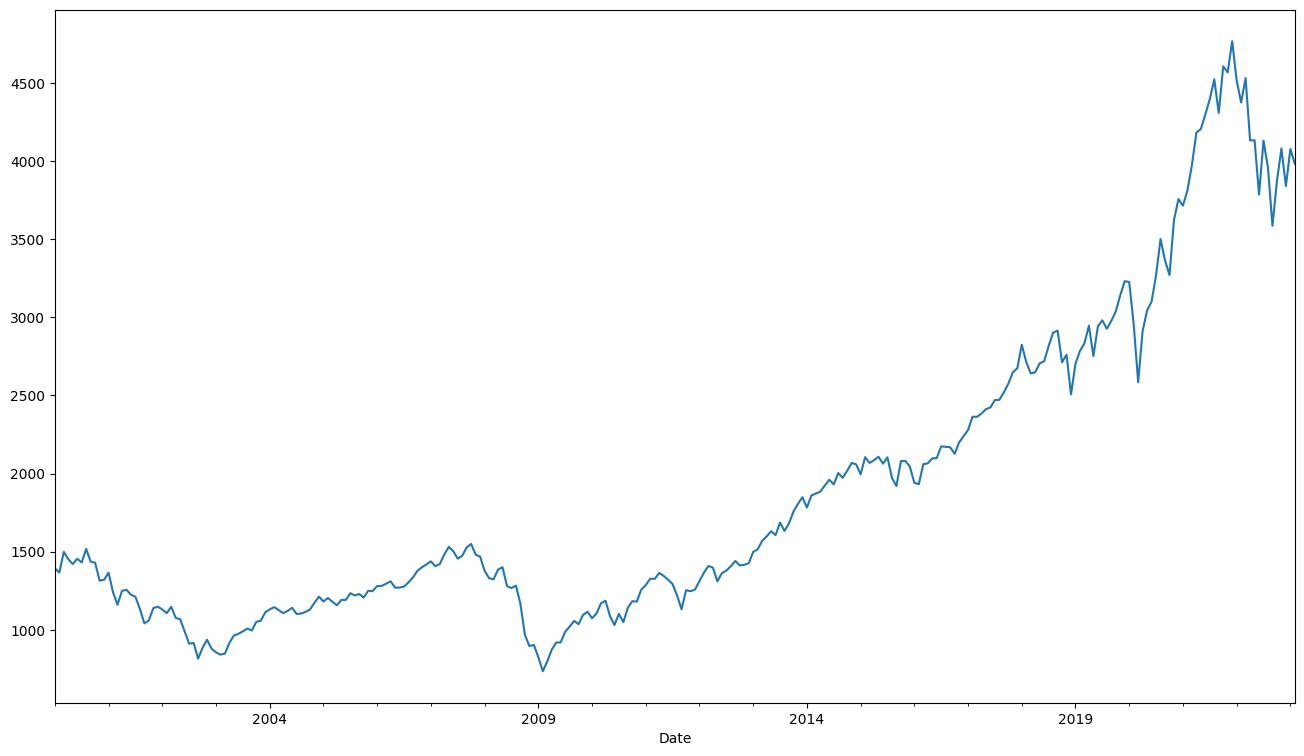

In [13]:
SP500M.Close.plot(figsize=(16,9)) # Es el mismo grafico solo que con otro periodo de tiempo, por eso el grafico lo vemos con menos detalle

In [14]:
NASDAQM = pdr.get_data_yahoo("^IXIC", start="2000-01-01", end="2023-02-23", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [15]:
NASDAQM.head() # Quiero comparar el SP500 con otro indice que es el NASDAQ, el cual reune solo empresas tecnologicas 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,4186.189941,4303.149902,3711.090088,3940.350098,3940.350098,33421060000
2000-02-01,3961.070068,4698.459961,3911.840088,4696.689941,4696.689941,35644700000
2000-03-01,4732.819824,5132.520020,4355.689941,4572.830078,4572.830078,43200490000
2000-04-01,4494.890137,4572.839844,3227.040039,3860.659912,3860.659912,35147970000
2000-05-01,3930.179932,3982.379883,3042.659912,3400.909912,3400.909912,30831980000


<Axes: xlabel='Date'>

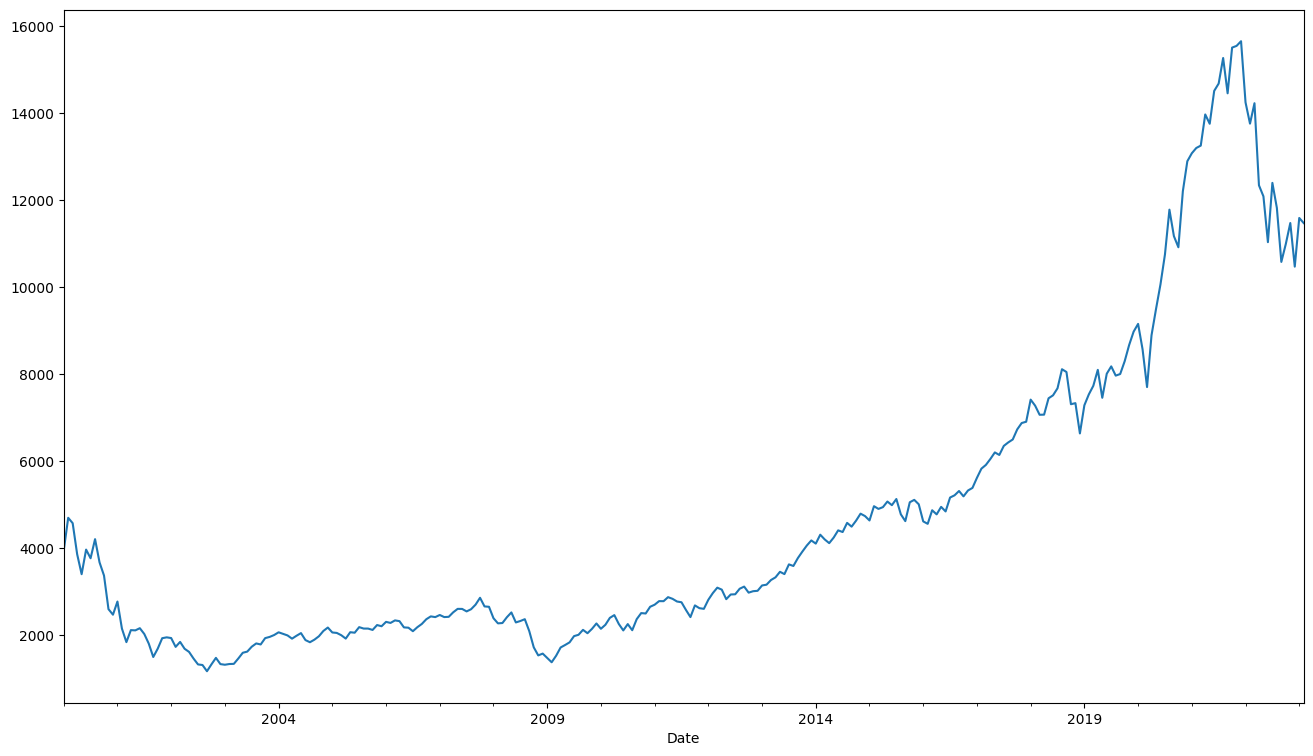

In [16]:
NASDAQM.Close.plot(figsize=(16,9))  # Hay mucha correlacion entre el SP500 y el NASDAQ, ya que las acciones que mas pesan en el SP500 son tecnologicas

In [17]:
SP500M['Close'].corr(NASDAQM['Close']) # El valor del indice de la correlacion de Pearson varia entre [-1,1]
                                       # Con la correlacion de Pearson podemos ver que los dos indices tienen una correlacion positiva muy fuerte
                                       # donde cada vez que sube un indice, el otro tambien lo hace, y asi mismo en las bajadas 

0.9894965009624924

In [18]:
BITCOIN = pdr.get_data_yahoo("BTC-USD", start="2000-01-01", end="2023-02-23", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [19]:
BITCOIN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


<Axes: xlabel='Date'>

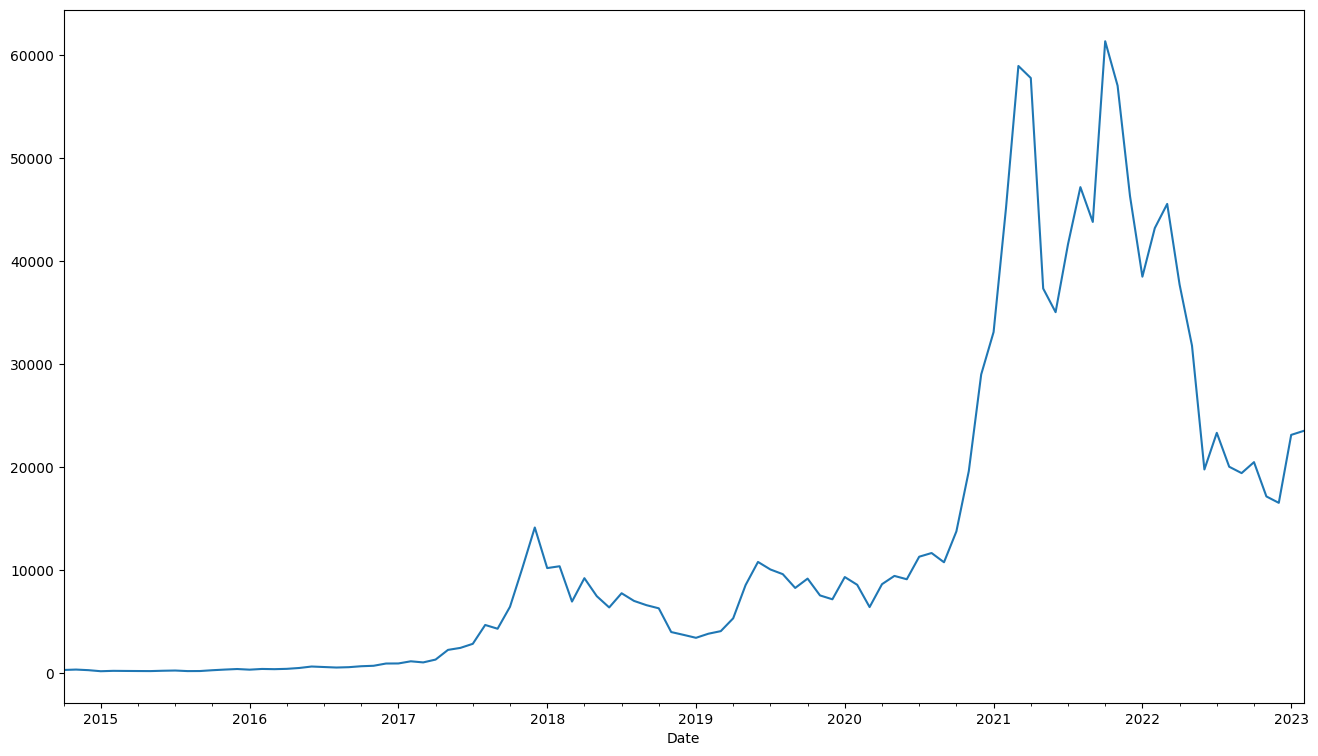

In [20]:
BITCOIN.Close.plot(figsize=(16,9))

In [21]:
SP500M['Close'].corr(BITCOIN['Close']) # Hice lo mismo con el Bitcoin y tambien tienen una correlacion fuerte
                                       # Esto nos da una idea de en que momento invertir, ya que si vemos como fluctuan los precios de los otros indices 
                                       # Podemos tomar decisiones de cuando entrar en el mercado 

0.9035852401010168

In [22]:
VOLATILITY = pdr.get_data_yahoo("^VIX", start="2000-01-01", end="2023-02-23", interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [23]:
VOLATILITY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,24.360001,29.000000,19.510000,24.950001,24.950001,0
2000-02-01,24.430000,28.120001,20.690001,23.370001,23.370001,0
2000-03-01,22.650000,25.870001,19.190001,24.110001,24.110001,0
2000-04-01,24.990000,34.310001,23.250000,26.200001,26.200001,0
2000-05-01,26.070000,32.889999,23.230000,23.650000,23.650000,0


<Axes: xlabel='Date'>

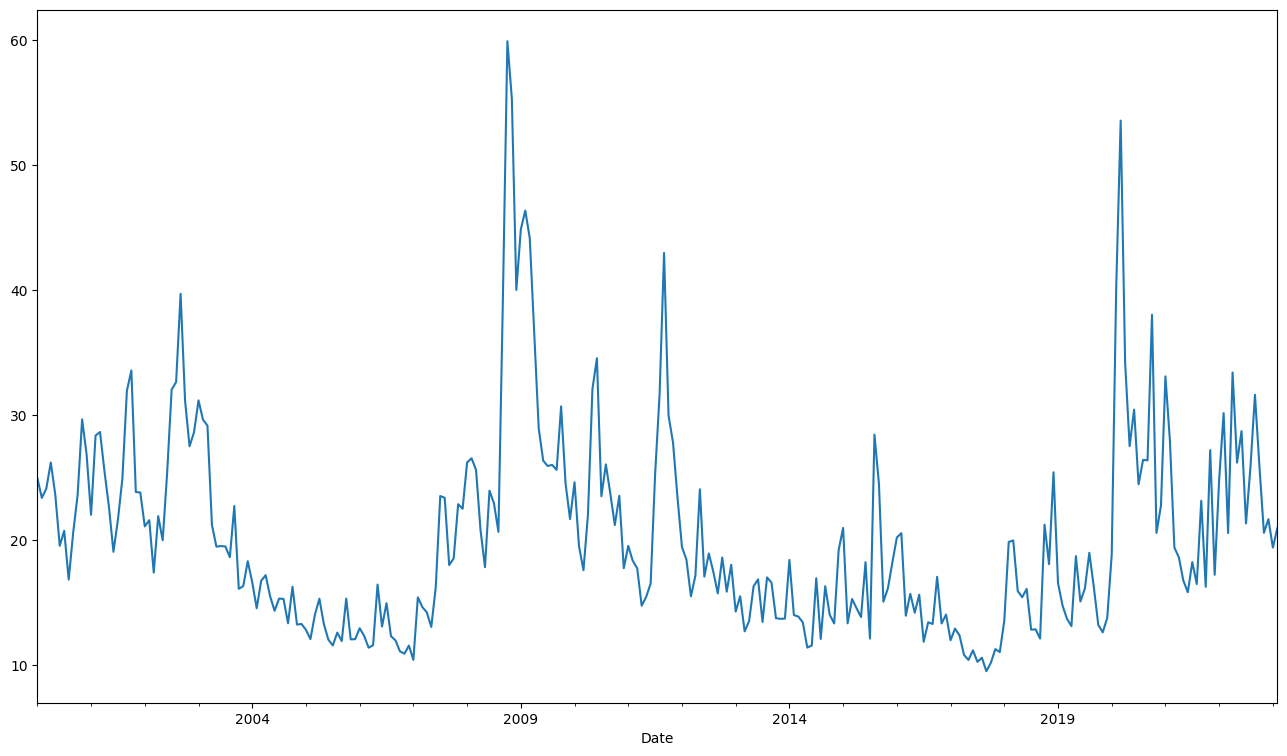

In [24]:
VOLATILITY.Close.plot(figsize=(16,9)) # El Vix hace referencia a la volatilidad del SP500, asi que es otro indicador que tendremos en cuenta para el analisis
                                      # Entre mayor sea el indice, significa que hay mas "panico" en el mercado y que es mejor no entrar

In [32]:
NASDAQ10 = pdr.get_data_yahoo("^IXIC", start="2023-02-13", end="2023-02-28")
SP50010 = pdr.get_data_yahoo("^GSPC", start="2023-02-13", end="2023-02-28")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
SP50010['Close'].corr(NASDAQ10['Close']) # Quiero ver la correlacion en los ultimos 10 dias entre estos dos indices... se mueven super parecido

0.9859379908472031

In [25]:
# Ahora voy a exportar la data que tengo a archivos CSV para leerla en PowerBI y hacer mi Dashboard

SP500M.to_csv('SP500M.csv')
NASDAQM.to_csv('NASDAQM.csv')
BITCOIN.to_csv('BITCOIN.csv')
VOLATILITY.to_csv('VIX.csv')
SP50010.to_csv('SP50010.csv')
NASDAQ10.to_csv('NASDAQ10.csv')